# Model Comparisons

# Stress Detection with IoT Wearables

## Introduction

This project predicts stress indicators in women using IoT wearables data. The dataset includes user behavior, physiological metrics, and environmental conditions. The goal is to leverage machine learning algorithms for stress detection.

## Models

1. **Logistic Regression:**
   - Linear model for binary classification.
  
2. **Random Forest:**
   - Ensemble learning method using decision trees.

3. **Support Vector Machine (SVM):**
   - Powerful classification algorithm based on hyperplanes.

4. **Gradient Boosting:**
   - Ensemble technique for improved accuracy.

## Data

- **Features:** UserID, Timestamp, Device Type, Pulse Rate, Body Temperature, Proximity, Ambient Noise, Movement Pattern, User Behavior.
- **Target:** Stress Indicator.

## Preprocessing

- **Timestamp:** Converted to datetime format.
- **Categorical Variables:** Encoded using Label Encoding.
- **Feature Selection:** Random Forest importance and SelectFromModel.

## Evaluation

Models are assessed using Accuracy, Precision, Recall, and F1 Score metrics. Hyperparameter tuning is done via GridSearchCV.

## Visualization

Bar plots compare model performance metrics. Box plots visualize cross-validation scores.

## Usage

1. Load the dataset.
2. Preprocess data.
3. Train and evaluate models.
4. Visualize model comparisons.

## Dependencies

- pandas
- scikit-learn
- matplotlib
- seaborn

## Author

Aaron Probha           : 2162202\
Amarthya Dutta Gupta   : 2162208\
Pawanjeet Thind Singh  : 2162234

## Date

20/12/2023


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report


Logistic Regression:
Best Parameters: {'C': 0.001}
Accuracy on Test Set: 0.82
              precision    recall  f1-score   support

          No       0.83      0.82      0.82       103
         Yes       0.81      0.82      0.82        97

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200


Random Forest:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy on Test Set: 0.885
              precision    recall  f1-score   support

          No       0.82      1.00      0.90       103
         Yes       1.00      0.76      0.87        97

    accuracy                           0.89       200
   macro avg       0.91      0.88      0.88       200
weighted avg       0.91      0.89      0.88       200


Support Vector Machine:
Best Parameters: {'C': 0.1, 'gamma': 0.1}
Accuracy on Test Set: 0.885
              precision 

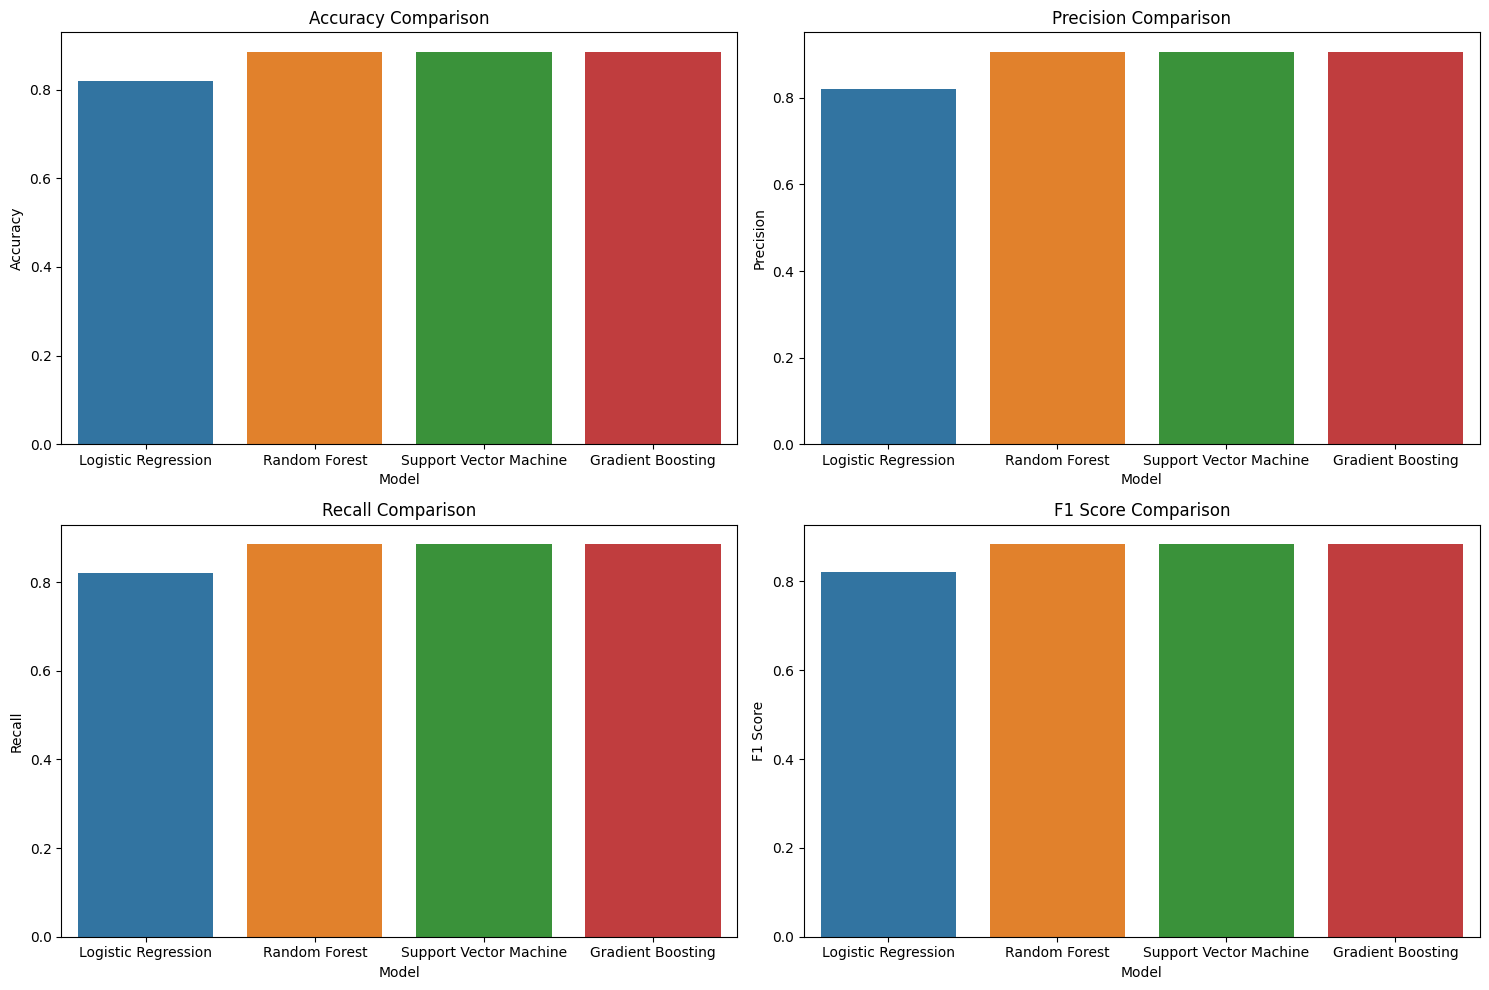

In [ ]:
df = pd.read_csv("Dataset\Raw_data.csv")

# Data Preprocessing
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df.drop(['Timestamp'], axis=1, inplace=True)

# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
df['Device Type'] = label_encoder.fit_transform(df['Device Type'])
df['Proximity to Unfamiliar Devices'] = label_encoder.fit_transform(df['Proximity to Unfamiliar Devices'])
df['Movement Pattern'] = label_encoder.fit_transform(df['Movement Pattern'])
df['User Behavior'] = label_encoder.fit_transform(df['User Behavior'])

# Split the data
X = df.drop(['Stress Indicator'], axis=1)
y = df['Stress Indicator']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Selection using Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_

# Select features with importance greater than a threshold
sfm = SelectFromModel(rf_model, threshold=0.35)
sfm.fit(X_train, y_train)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Containers for results
model_results_list = []

# Hyperparameter tuning using GridSearchCV for each model
for model_name, model in models.items():
    print(f"\n{model_name}:")

    if model_name == 'Logistic Regression':
        param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    elif model_name == 'Random Forest':
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    elif model_name == 'Support Vector Machine':
        param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto']}
    elif model_name == 'Gradient Boosting':
        param_grid = {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')
    grid_search.fit(X_train_selected, y_train)

    # Use the best parameters for the final model
    best_params = grid_search.best_params_
    best_model = model.__class__(**best_params)
    best_model.fit(X_train_selected, y_train)

    # Evaluate on the test set
    y_pred = best_model.predict(X_test_selected)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']

    # Save results to containers
    model_results_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score
    })

    # Print classification report and accuracy
    print("Best Parameters:", best_params)
    print("Accuracy on Test Set:", accuracy)
    print(classification_report(y_test, y_pred))

# Convert the list to a DataFrame
model_results = pd.DataFrame(model_results_list)

# Plotting
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x='Model', y=metric, data=model_results)
    plt.title(f'{metric} Comparison')

plt.tight_layout()
plt.show()

# Cross-Validation Scores Comparison
cv_scores_df = pd.DataFrame({model_name: cross_val_score(model, X_train_selected, y_train, cv=cv, scoring='accuracy') for model_name, model in models.items()})

plt.figure(figsize=(10, 6))
sns.boxplot(data=cv_scores_df)
plt.title('Cross-Validation Scores Comparison')
plt.xticks(rotation=45)
plt.show()
